### Loading Dataset and Preprocessing

In [5]:
import numpy,pandas
import matplotlib.pyplot as plt
%matplotlib inline
import pandas,math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#fix random seed
numpy.random.seed(7)

In [16]:
#load dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
#normalize the dataset
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]



# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


look_back=1
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)


The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].

Currently, our data is in the form: [samples, features] and we are framing the problem as one time step for each sample. We can transform the prepared train and test input data into the expected structure using numpy.reshape() as follows:

In [17]:
#rshape into [samples,timesteps,features]
trainX=numpy.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=numpy.reshape(testX,(testX.shape[0],1,test.shape[1]))
print trainX

[[[ 0.01544401]]

 [[ 0.02702703]]

 [[ 0.05405405]]

 [[ 0.04826255]]

 [[ 0.03281853]]

 [[ 0.05984557]]

 [[ 0.08494207]]

 [[ 0.08494207]]

 [[ 0.06177607]]

 [[ 0.02895753]]

 [[ 0.        ]]

 [[ 0.02702703]]

 [[ 0.02123553]]

 [[ 0.04247104]]

 [[ 0.07142857]]

 [[ 0.05984557]]

 [[ 0.04054055]]

 [[ 0.08687258]]

 [[ 0.12741312]]

 [[ 0.12741312]]

 [[ 0.10424709]]

 [[ 0.05598456]]

 [[ 0.01930502]]

 [[ 0.06949806]]

 [[ 0.07915059]]

 [[ 0.08880308]]

 [[ 0.14285713]]

 [[ 0.11389962]]

 [[ 0.13127413]]

 [[ 0.14285713]]

 [[ 0.18339768]]

 [[ 0.18339768]]

 [[ 0.15444016]]

 [[ 0.11196911]]

 [[ 0.08108109]]

 [[ 0.1196911 ]]

 [[ 0.12934363]]

 [[ 0.14671814]]

 [[ 0.17181468]]

 [[ 0.14864865]]

 [[ 0.15250966]]

 [[ 0.22007722]]

 [[ 0.24324325]]

 [[ 0.26640925]]

 [[ 0.2027027 ]]

 [[ 0.16795367]]

 [[ 0.13127413]]

 [[ 0.17374519]]

 [[ 0.17760617]]

 [[ 0.17760617]]

 [[ 0.25482625]]

 [[ 0.25289574]]

 [[ 0.24131274]]

 [[ 0.26833975]]

 [[ 0.3088803 ]]

 [[ 0.3243

In [18]:
#create and fit the LSTM
model=Sequential()
model.add(LSTM(4,input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,nb_epoch=100,batch_size=1,verbose=1)

Epoch 1/100
94/94 [==============================] - 0s - loss: 0.0461     
Epoch 2/100
94/94 [==============================] - 0s - loss: 0.0227     
Epoch 3/100
94/94 [==============================] - 0s - loss: 0.0160     
Epoch 4/100
94/94 [==============================] - 0s - loss: 0.0143     
Epoch 5/100
94/94 [==============================] - 0s - loss: 0.0134     
Epoch 6/100
94/94 [==============================] - 0s - loss: 0.0126     
Epoch 7/100
94/94 [==============================] - 0s - loss: 0.0116     
Epoch 8/100
94/94 [==============================] - 0s - loss: 0.0106     
Epoch 9/100
94/94 [==============================] - 0s - loss: 0.0095     
Epoch 10/100
94/94 [==============================] - 0s - loss: 0.0083     
Epoch 11/100
94/94 [==============================] - 0s - loss: 0.0071     
Epoch 12/100
94/94 [==============================] - 0s - loss: 0.0059     
Epoch 13/100
94/94 [==============================] - 0s - loss: 0.0048     
Epoch 14

In [28]:
#make preditions
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)
#invert predictions
trainPredict=scaler.inverse_transform(trainPredict)
trainY=scaler.inverse_transform(trainY)
testPredict=scaler.inverse_transform(testPredict)
testY=scaler.inverse_transform(testY)

Train Score: 31335406962.41 RMSE
Test Score: 58747235958.73 RMSE


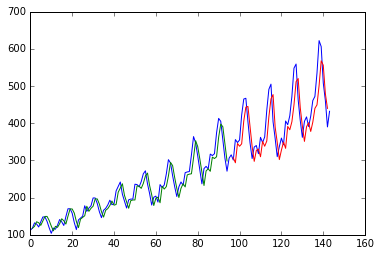

In [30]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()